In [1]:
from IPython.display import Image

import numpy as np
np.random.seed(1)

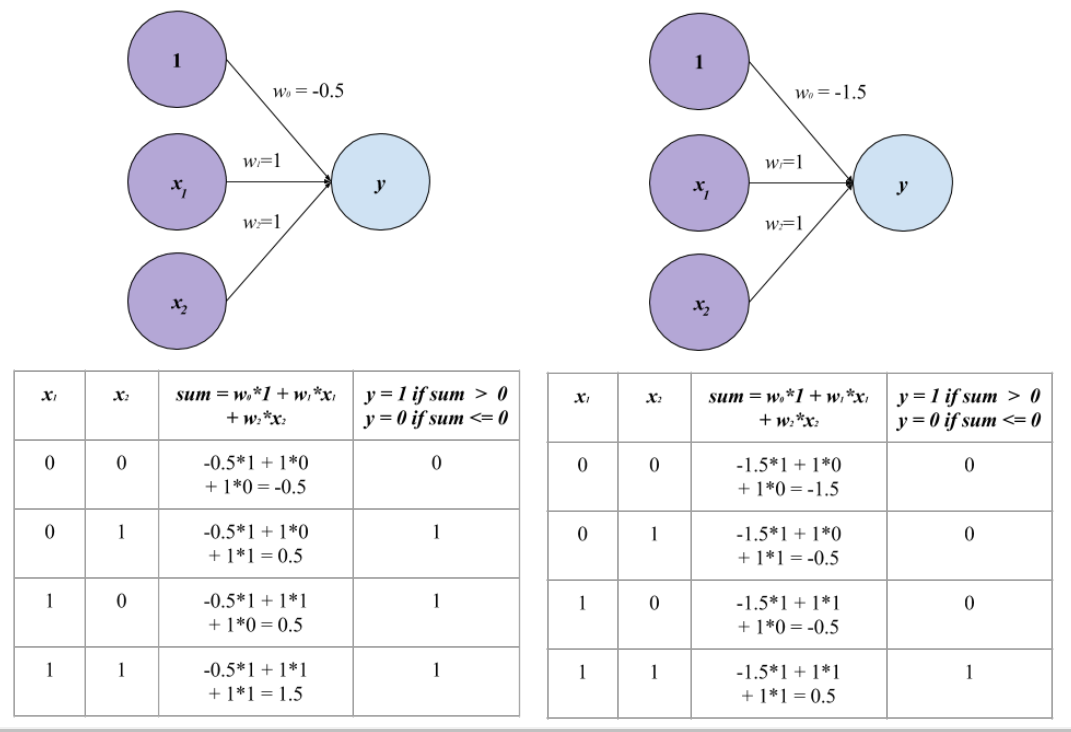

In [2]:
Image(filename='and-or.png')

In [3]:
or_input = np.array([[0,0], [0,1], [1,0], [1,1]])
or_output = np.array([[0,1,1,1]]).T


In [4]:
or_input

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [5]:
or_output

array([[0],
       [1],
       [1],
       [1]])

In [6]:
def sigmoid(x): # Returns values that range between -1 and 1
    # BTW, this is pretty fun stuff: https://www.google.com.sg/#q=1/(1%2Bexp(-x))
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x): # We don't really care what it outputs, lolz...
    return x*(1-x)

In [7]:
sigmoid(np.array([2.5, 0.32, -1.42]))

array([ 0.92414182,  0.57932425,  0.19466158])

In [8]:
sigmoid_derivaive(np.array([2.5, 0.32, -1.42]))

NameError: name 'sigmoid_derivaive' is not defined

In [9]:
sigmoid_derivative(np.array([2.5, 0.32, -2.42]))

array([-3.75  ,  0.2176, -8.2764])

In [10]:
def cost(predicted, truth):
    return truth - predicted
    

In [11]:
gold = np.array([0.5, 1.2, 9.8])
pred = np.array([0.6, 1.0, 10.0])
cost(pred, gold)

array([-0.1,  0.2, -0.2])

In [12]:
gold = np.array([0.5, 1.2, 9.8])
pred = np.array([9.3, 4.0, 99.0])
cost(pred, gold)

array([ -8.8,  -2.8, -89.2])

In [13]:
num_data, input_dim = or_input.shape
output_dim = len(or_output.T)

# Initialize weights for the input layer, aka "syn0", syn is short for synapse. 
syn0 = np.random.random((input_dim, output_dim)) 

In [14]:
num_epochs = 10000
learning_rate = 1.0

X = or_input
y = or_output

for _ in range(num_epochs):
    # forward propagation.
    l0 = X
    l1 = sigmoid(np.dot(l0, syn0))

    # how much did we miss?
    l1_error = cost(l1, y)

    # back propagation.
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * sigmoid_derivative(l1)

    # update weights
    syn0 +=  learning_rate * np.dot(l0.T, l1_delta)


In [15]:
l1

array([[ 0.5       ],
       [ 0.99283162],
       [ 0.99282994],
       [ 0.99994786]])

In [16]:
[int(l > 0.5) for l in l1]

[0, 1, 1, 1]

In [17]:
or_output

array([[0],
       [1],
       [1],
       [1]])

Do the same but with 1 more hidden layer
====

In [18]:
def sigmoid(x): # Returns values that range between -1 and 1
    # BTW, this is pretty fun stuff: https://www.google.com.sg/#q=1/(1%2Bexp(-x))
    return 1/(1+np.exp(-x)) # ... # YOUR CODE HERE

def sigmoid_derivative(x): # We don't really care what it outputs, lolz...
    return x*(1-x) # ... # YOUR CODE HERE

# Cost functions.
def cost(predicted, truth):
    return truth - predicted


X = or_input = np.array([[0,0], [0,1], [1,0], [1,1]])
y = or_output = np.array([[0,1,1,1]]).T

# Initialize weights for the input layer, aka "syn0", syn is short for synapse. 
num_data, input_dim = or_input.shape
hidden_dim = ... # YOUR CODE HERE
syn0 = ... # YOUR CODE HERE

# Initialize weights for the first hidden layer, aka "syn1".
output_dim = ... # YOUR CODE HERE
syn1 = ... # YOUR CODE HERE


num_epochs = 10000
learning_rate = 1.0
cost = cost

for _ in range(num_epochs):
    # forward propagation.
    l0 = X
    l1 = sigmoid(np.dot(l0, syn0))
    l2 = sigmoid(np.dot(l1, syn1))

    # how much did we miss?
    l2_error = cost(l2, y)

    # Now we back propagate...
    
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error * sigmoid_derivative(l2)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = ... # YOUR CODE HERE

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

In [19]:
l2 # output layer.

array([[ 0.01286598],
       [ 0.99285218],
       [ 0.99266375],
       [ 0.99797014]])

In [20]:
l1 # hidden layer.

array([[ 0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ],
       [ 0.05030027,  0.9370088 ,  0.06046283,  0.88587697,  0.87996499],
       [ 0.0475292 ,  0.93480791,  0.05574036,  0.86846293,  0.84798218],
       [ 0.00263601,  0.99533365,  0.00378448,  0.98086165,  0.9761297 ]])

Now let's make it even more challenging, 
====
we'll drop one data point and use 3 layers 
====

In [21]:
def sigmoid(x): # Returns values that range between -1 and 1
    # BTW, this is pretty fun stuff: https://www.google.com.sg/#q=1/(1%2Bexp(-x))
    return 1/(1+np.exp(-x)) # ... # YOUR CODE HERE

def sigmoid_derivative(x): # We don't really care what it outputs, lolz...
    return x*(1-x) # ... # YOUR CODE HERE

# Cost functions.
def cost(predicted, truth):
    return truth - predicted


X = or_input = np.array([[0,0], [0,1], [1,0]])
y = or_output = np.array([[0,1,1]]).T

# Initialize weights for the input layer, aka "syn0", syn is short for synapse. 
num_data, input_dim = or_input.shape
hidden_dim_1 = 5 # YOUR CODE HERE
syn0 = ... # YOUR CODE HERE

# Initialize weights for the first hidden layer, aka "syn1".
hidden_dim_2 = 3 # YOUR CODE HERE
syn1 = ... # YOUR CODE HERE

# Initialize weights for the first hidden layer, aka "syn2".
output_dim = ... # YOUR CODE HERE
syn2 =... # YOUR CODE HERE

                       
num_epochs = 10000
learning_rate = 1.0
cost = cost

for _ in range(num_epochs):
    # forward propagation.
    l0 = X
    l1 = ... # YOUR CODE HERE
    l2 = ... # YOUR CODE HERE
    l3 = ... # YOUR CODE HERE

    # how much did we miss?
    l3_error = ... # YOUR CODE HERE                        

    # Now we back propagate...
    
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l3_delta = ... # YOUR CODE HERE
                         
    # how much did each l2 value contribute to the l3 error (according to the weights)?
    l2_error = ... # YOUR CODE HERE                   

    # in what direction is the l2 weights changing?
    l2_delta = ... # YOUR CODE HERE

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = ... # YOUR CODE HERE
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = ... # YOUR CODE HERE
                         
    syn2 += ... # YOUR CODE HERE
    syn1 += ... # YOUR CODE HERE
    syn0 += ... # YOUR CODE HERE

In [22]:
l3

array([[ 0.00798033],
       [ 0.99521575],
       [ 0.99523938]])

In [23]:
new_input = np.array([[1,1]])
# apply l1 to new input
_l1 = sigmoid(np.dot(new_input, syn0))
# apply l2 to new input
_l2 = sigmoid(np.dot(_l1, syn1))
# apply l3 (output layer) to new input
prediction = _l3 = sigmoid(np.dot(_l2, syn2))

prediction

array([[ 0.99821909]])

Now let's do the same in tensorflow!!!
====

In [24]:
import tensorflow as tf

In [25]:
# Parameters
learning_rate = 1.0
num_epochs = 10000

# Network Parameters
hidden_dim_1 = 5 # 1st layer number of features
hidden_dim_2 = 3 # 2nd layer number of features
input_dim = 2 # Input dimensions.
output_dim = 1 # Output dimensions.

# tf Graph input
x = tf.placeholder("float", [None, input_dim])
y = ... # YOUR CODE HERE

In [26]:
# Without biases.

weights = {
    'syn0': tf.Variable(tf.random_normal([input_dim, hidden_dim_1])),
    'syn1': tf.Variable(tf.random_normal([hidden_dim_1, hidden_dim_2])),
    'syn2': tf.Variable(tf.random_normal([hidden_dim_2, output_dim]))
}

# Create a model
def multilayer_perceptron(X, weights, biases):
    # Hidden layer 1
    layer_1 = tf.matmul(X, weights['syn0'])
    # Hidden layer 2
    layer_2 = ... # YOUR CODE HERE
    # Output layer
    out_layer = ... # YOUR CODE HERE
    return out_layer

In [27]:
# With biases.
weights = {
    'syn0': tf.Variable(tf.random_normal([input_dim, hidden_dim_1])),
    'syn1': tf.Variable(tf.random_normal([hidden_dim_1, hidden_dim_2])),
    'syn2': tf.Variable(tf.random_normal([hidden_dim_2, output_dim]))
}


biases = {
    'b0': tf.Variable(tf.random_normal([hidden_dim_1])),
    'b1': tf.Variable(tf.random_normal([hidden_dim_2])),
    'b2': tf.Variable(tf.random_normal([output_dim]))
}


# Create a model
def multilayer_perceptron(X, weights, biases):
    # Hidden layer 1
    layer_1 = tf.add(tf.matmul(X, weights['syn0']), biases['b0'])
    # Hidden layer 2
    layer_2 = ... # YOUR CODE HERE
    # Output layer
    out_layer = ... # YOUR CODE HERE
    return out_layer

In [28]:
# With biases.
weights = {
    'syn0': tf.Variable(tf.random_normal([input_dim, hidden_dim_1])),
    'syn1': tf.Variable(tf.random_normal([hidden_dim_1, hidden_dim_2])),
    'syn2': tf.Variable(tf.random_normal([hidden_dim_2, output_dim]))
}


biases = {
    'b0': tf.Variable(tf.random_normal([hidden_dim_1])),
    'b1': tf.Variable(tf.random_normal([hidden_dim_2])),
    'b2': tf.Variable(tf.random_normal([output_dim]))
}


# Create a model
def multilayer_perceptron(X, weights, biases):
    # Hidden layer 1  + sigmoid activation function
    layer_1 = tf.add(tf.matmul(X, weights['syn0']), biases['b0'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden layer 2 + sigmoid activation function
    layer_2 = ... # YOUR CODE HERE
    layer_2 = ... # YOUR CODE HERE
    # Output layer
    out_layer = ... # YOUR CODE HERE
    out_layer = ... # YOUR CODE HERE
    return out_layer

In [29]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.sub(y, pred) 
# Or you can use fancy cost like:
##tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.initialize_all_variables()

In [30]:
np.array([[0,1,1]]).T

array([[0],
       [1],
       [1]])

In [31]:
or_input = np.array([[0.,0.], [0.,1.], [1.,0.]])
or_output = np.array([[0.,1.,1.]]).T

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(num_epochs):
        batch_x, batch_y = or_input, or_output # Loop over all data points.
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        #print (c)
        
    # Now let's test it on the unknown dataset.
    new_inputs = np.array([[1.,1.], [1.,0.]])
    feed_dict = {x: new_inputs}
    predictions = sess.run(pred, feed_dict)
    print (predictions)

[[ 0.99999201]
 [ 0.99999034]]


Now let's do the same in tensorflow learn (aka skflow)!!!
====

In [32]:
from tensorflow.contrib import learn

In [33]:
classifier = learn.DNNClassifier(hidden_units=[5, 3], n_classes=2)

In [34]:
or_input = np.array([[0.,0.], [0.,1.], [1.,0.]])
or_output = np.array([[0,1,1]]).T

classifier.fit(or_input, or_output, steps=0.05, batch_size=3)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py:1197: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)


DNNClassifier()

In [35]:
classifier.predict(np.array([ [1., 1.], [1., 0.] , [0., 0.] , [0., 1.]]))

array([0, 0, 1, 0])

Now try it with `steps=1000`
====

In [37]:
from tensorflow.contrib import learn
classifier = ... # YOUR CODE HERE

or_input = np.array([[0.,0.], [0.,1.], [1.,0.]])
or_output = np.array([[0,1,1]]).T

classifier.fit(...) ... # YOUR CODE HERE
classifier.predict(np.array([ [1., 1.], [1., 0.] , [0., 0.] , [0., 1.]]))

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py:1197: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)


array([1, 1, 0, 1])